In [3]:
import requests
import pandas as pd
import time


In [2]:
api_key = "e4c83880e243dee13523db35695addfb"

# Define the Last.fm API base URL
base_url = 'http://ws.audioscrobbler.com/2.0/'

# Define the parameters for the request
params = {
    'track': 'waterloo',
    'autocorrect': 1,
    'method': 'track.getinfo',
    'artist': 'ABBA',  # Replace with the artist you want to search for
    'api_key': api_key,
    'format': 'json'  # You can also use 'xml' if you prefer XML format
}

# Make the API request
response = requests.get(base_url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    try:
        # Access the data you need
        track_info = data['track']

        # Print the tracks listeners and playcount
        print(f"listeners: {track_info['listeners']}")
        print(f"playcount: {track_info['playcount']}")
        # print the track's tags names
        for tag in track_info['toptags']['tag']:
            print(tag['name'])
    except KeyError:
        print("Error: Track not found")
else:
    print(f"Error: {response.status_code}")

listeners: 687135
playcount: 3809927
pop
70s
abba
Disco
swedish


In [8]:
def get_track_info(artist, track, api_key):
    # Define the Last.fm API base URL
    base_url = 'http://ws.audioscrobbler.com/2.0/'

    # Define the parameters for the request
    params = {
        'track': track,
        'autocorrect': 1,
        'method': 'track.getinfo',
        'artist': artist,
        'api_key': api_key,
        'format': 'json'
    }

    # Make the API request
    response = requests.get(base_url, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        try:
            # Parse the JSON response
            data = response.json()

            # Access the data you need
            track_info = data['track']

            # Extract the track's listeners and playcount
            listeners = track_info['listeners']
            playcount = track_info['playcount']

            # Extract the track's tags and store them in a list
            tags = [tag['name'] for tag in track_info['toptags']['tag']]

            # Return the information as a list
            return [listeners, playcount, tags]
        except :
            return ["Error: Track not found"]
    else:
        return [response.status_code]

# Example usage:
api_key = "e4c83880e243dee13523db35695addfb"  # Replace with your Last.fm API key
artist = 'ABBA'  # Replace with the artist you want to search for
track = 'Waterloo'  # Replace with the track name

info = get_track_info(artist, track, api_key)
print("Listeners:", info[0])
print("Playcount:", info[1])
print("Tags:", info[2])

Listeners: 688151
Playcount: 3817801
Tags: ['pop', '70s', 'abba', 'Disco', 'swedish']


In [15]:
info = get_track_info('annie jena', 'chup chap basi', api_key)
info

['Error: Track not found']

In [18]:
df = pd.read_csv('Data/reduced_isrc.csv', index_col=0)
#just take 10 random rows of df
#df = df.sample(10)

print(df.shape)

# remove rows with 0 popularity
df = df[df['popularity'] > 4]

print(df.shape)

(139629, 27)
(74664, 27)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74664 entries, 13 to 139604
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isrc                    74664 non-null  object 
 1   genres                  74664 non-null  object 
 2   name                    74664 non-null  object 
 3   artists                 74664 non-null  object 
 4   album                   74664 non-null  object 
 5   release_date            74664 non-null  object 
 6   release_date_precision  74664 non-null  object 
 7   uri                     74664 non-null  object 
 8   spotify_id              74664 non-null  object 
 9   chart_power             623 non-null    float64
 10  popularity              74664 non-null  int64  
 11  danceability            74664 non-null  float64
 12  energy                  74664 non-null  float64
 13  key                     74664 non-null  int64  
 14  loudness                74664 non-null  f

In [20]:


# Add new columns for Listeners, Playcount, and Tags
df['Listeners'] = ""
df['Playcount'] = ""
df['Tags'] = ""

# Your Last.fm API key
api_key = "e4c83880e243dee13523db35695addfb"  # Replace with your Last.fm API key

error_cnt = 0

# Iterate over the DataFrame rows and call the function for each row if listeners and playcount are empty
for index, row in df.iterrows():
    if row['Listeners'] != "" and row['Playcount'] != "":
        continue
    else:
        artist = row['artists']
        #only take the first artist
        artist = artist.split(",")[0]
        track = row['name']
        
        # Call the function to get track information
        info = get_track_info(artist, track, api_key)
        
        # Check if the info list has the expected length (at least 3 elements)
        if len(info) >= 3:
            df.at[index, 'Listeners'] = info[0]
            df.at[index, 'Playcount'] = info[1]
            df.at[index, 'Tags'] = info[2]
        elif info[0] == "Error: Track not found":        
            df.at[index, 'Listeners'] = "N/A"
            df.at[index, 'Playcount'] = "N/A"
            df.at[index, 'Tags'] = "N/A"
        else:
            # end for loop and print error code
            print(index, row['artists'], row['name'])
            print(f"Error: {info[0]}")
            error_cnt += 1
            print(f"Error Cnt: {error_cnt}")
            if error_cnt > 10:
                break
            time.sleep(1000)
    
    #wait for 1 seconds before making another API call
    time.sleep(1)
    
df


# Specify the file path where you want to save the CSV file
csv_file_path = 'data.csv'  # Replace with your desired file path

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74664 entries, 13 to 139604
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isrc                    74664 non-null  object 
 1   genres                  74664 non-null  object 
 2   name                    74664 non-null  object 
 3   artists                 74664 non-null  object 
 4   album                   74664 non-null  object 
 5   release_date            74664 non-null  object 
 6   release_date_precision  74664 non-null  object 
 7   uri                     74664 non-null  object 
 8   spotify_id              74664 non-null  object 
 9   chart_power             623 non-null    float64
 10  popularity              74664 non-null  int64  
 11  danceability            74664 non-null  float64
 12  energy                  74664 non-null  float64
 13  key                     74664 non-null  int64  
 14  loudness                74664 non-null  f

In [22]:
#count the number of rows with N/A in Listeners column
df[df['Listeners'] == 'N/A'].count()

isrc                      155
genres                    155
name                      155
artists                   155
album                     155
release_date              155
release_date_precision    155
uri                       155
spotify_id                155
chart_power                 0
popularity                155
danceability              155
energy                    155
key                       155
loudness                  155
mode                      155
speechiness               155
acousticness              155
instrumentalness          155
liveness                  155
valence                   155
tempo                     155
duration_ms               155
time_signature            155
year                      155
country_code              155
country                   155
Listeners                 155
Playcount                 155
Tags                      155
dtype: int64

In [23]:
#count the number of rows with N/A in Playcount column
df[df['Playcount'] == 'N/A'].count()

isrc                      155
genres                    155
name                      155
artists                   155
album                     155
release_date              155
release_date_precision    155
uri                       155
spotify_id                155
chart_power                 0
popularity                155
danceability              155
energy                    155
key                       155
loudness                  155
mode                      155
speechiness               155
acousticness              155
instrumentalness          155
liveness                  155
valence                   155
tempo                     155
duration_ms               155
time_signature            155
year                      155
country_code              155
country                   155
Listeners                 155
Playcount                 155
Tags                      155
dtype: int64

In [24]:
#count the number of rows with N/A in Tags column
df[df['Tags'] == 'N/A'].count()

isrc                      155
genres                    155
name                      155
artists                   155
album                     155
release_date              155
release_date_precision    155
uri                       155
spotify_id                155
chart_power                 0
popularity                155
danceability              155
energy                    155
key                       155
loudness                  155
mode                      155
speechiness               155
acousticness              155
instrumentalness          155
liveness                  155
valence                   155
tempo                     155
duration_ms               155
time_signature            155
year                      155
country_code              155
country                   155
Listeners                 155
Playcount                 155
Tags                      155
dtype: int64

In [27]:
#count the number of rows with empty string in Listeners column
df[df['Playcount'] == '0'].count()

isrc                      8
genres                    8
name                      8
artists                   8
album                     8
release_date              8
release_date_precision    8
uri                       8
spotify_id                8
chart_power               0
popularity                8
danceability              8
energy                    8
key                       8
loudness                  8
mode                      8
speechiness               8
acousticness              8
instrumentalness          8
liveness                  8
valence                   8
tempo                     8
duration_ms               8
time_signature            8
year                      8
country_code              8
country                   8
Listeners                 8
Playcount                 8
Tags                      8
dtype: int64

In [28]:
#show the deviation of the values in the Listeners column
df['Listeners'].describe()

count     74664
unique    21548
top         N/A
freq        155
Name: Listeners, dtype: object

In [30]:
#delete rows with N/A in Listeners column
df = df[df['Listeners'] != 'N/A']
#delete rows with N/A in Playcount column
df = df[df['Playcount'] != 'N/A']
#delete rows with N/A in Tags column
df = df[df['Tags'] != 'N/A']

In [32]:
#make sure the values in the Listeners column are integers
df['Listeners'] = df['Listeners'].astype(int)
#make sure the values in the Playcount column are integers
df['Playcount'] = df['Playcount'].astype(int)

<Axes: ylabel='Frequency'>

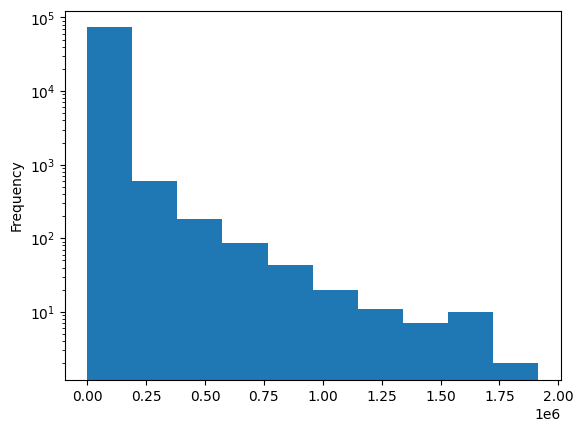

In [36]:
#plot the distribution of the values in the Listeners column as a histogram with log scale
df['Listeners'].plot(kind='hist', logy=True)

In [38]:
df.shape


(74509, 30)

In [39]:
# delete rows with empty string in Listeners column
df = df[df['Listeners'] != '']
# delete rows with empty string in Playcount column
df = df[df['Playcount'] != '']
df.shape

(74509, 30)

In [ ]:
#delete rows with Listeners under 100
df = df[df['Listeners'] > 100]
df.shape

In [ ]:
#delete rows with Playcount under 1000
df = df[df['Playcount'] > 1000]
df.shape